In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [46]:
def graficar(grafico, titulo, x_label, y_label):
    grafico.set_title(titulo)
    grafico.set_xlabel(x_label)
    grafico.set_ylabel(y_label)
    return grafico


In [47]:
diccionario_tipos = {
    "tipodepropiedad":"category",
    "provincia":"category",
    "provincia":"category",
    #"habitaciones":"int",
    #"garages":"int",
    #"banos":"int",
    #'metroscubiertos':, 'metrostotales', 'idzona', 'lat', 'lng',
    'gimnasio':"bool",
    'usosmultiples':"bool",
    'piscina':"bool",
    'escuelascercanas':"bool",
    'centroscomercialescercanos':"bool"
}
df = pd.read_csv("data/train.csv", dtype = diccionario_tipos)

In [48]:
df[["antiguedad"]].describe()

,antiguedad
count,196445.000000
mean,8.116114
std,9.553830
min,0.000000
25%,0.000000
50%,5.000000
75%,10.000000
max,80.000000


Text(0,0.5,'Frecuencia')

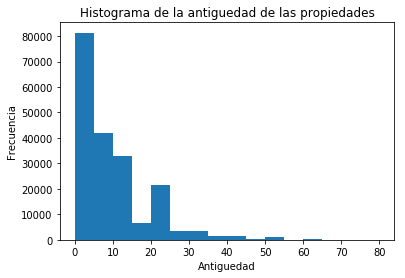

In [49]:
g = df["antiguedad"].plot.hist(bins=16)
g.set_title("Histograma de la antiguedad de las propiedades")
g.set_xlabel("Antiguedad")
g.set_ylabel("Frecuencia")

Podemos ver como la distribucion de la antiguedad, nos da con mucha mayor frecuencia ventas de propiedades nuevas o casi nuevas, mientras que hay muchas menos propiedades mas antiguas

In [50]:
cant_propiedades_nuevas = df.loc[df["antiguedad"]==0, "antiguedad"].count()
cant_propiedades_totales = df["antiguedad"].count()
print(f"La cantidad de propiedades nuevas es: {cant_propiedades_nuevas}, lo cual representa un {cant_propiedades_nuevas*100 / cant_propiedades_totales}%")

Como vemos las propiedades nuevas representan un **25%** de las propiedades en venta.
Por lo tanto vamos a ver cual es la distribución de la  antiguedad quitando las propiedades nuevas

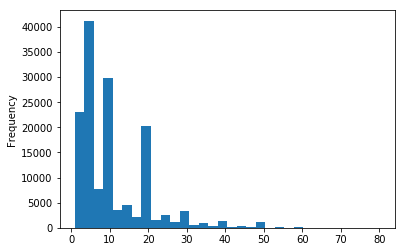

In [51]:
ventas_no_nuevas = df.loc[df["antiguedad"]>0]
ventas_no_nuevas["antiguedad"].plot.hist(bins = 32)

Podemos ver que aún sacando las ventas de inmuebles nuevos predominan las ventas de propiedades con una antiguedad **menor a diez**

## Analsisi de inmuebles nuevos
Como vimos, tenemos un cuarto de los inmuebles en venta que son a nuevo. Por lo tanto es interesante indagar sobre que características tienen estas propiedades: ¿Son mayoritariamente departamentos (porque se hacen edificios a nuevo)? ¿Tienen un precio mayor que la media? ¿Predominan en las provincias y ciudades mas importantes?

In [52]:
nuevos = df.loc[df["antiguedad"] == 0]

#### Que tipos de propiedad predominan en las ventas a nuevo?

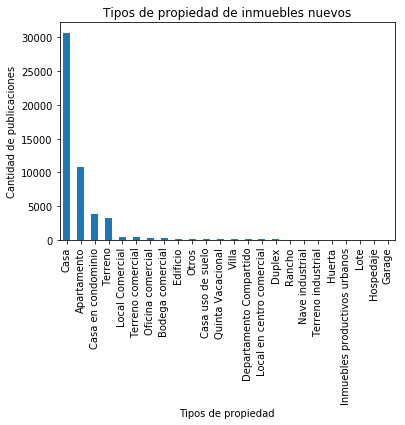

In [53]:
nuevos["tipodepropiedad"].value_counts().plot.bar()

Vemos que predominan las casas y apartamentos y pareciera que hay algunas categorías que no tienen ninguna publicación a nuevo

In [54]:
nuevos["tipodepropiedad"].value_counts().loc[lambda x: x == 0]

Hospedaje    0
Garage       0
Name: tipodepropiedad, dtype: int64

#### Locación de las propiedades nuevas

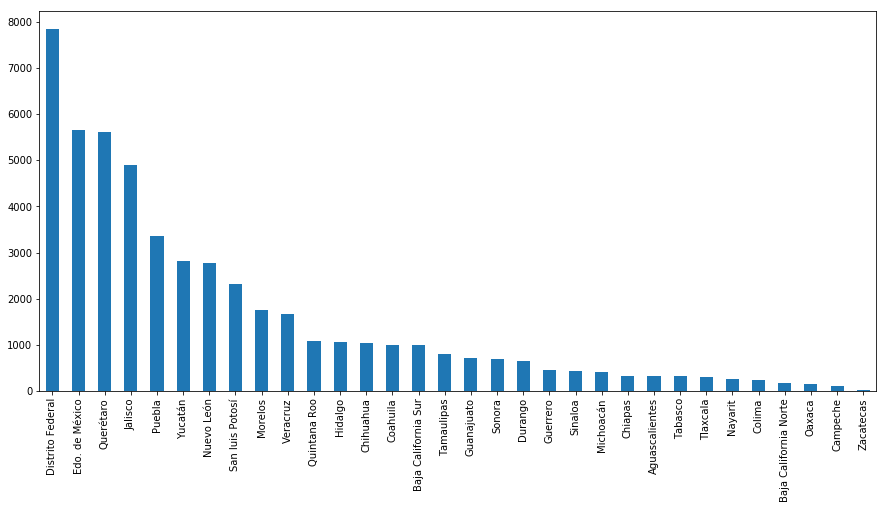

In [93]:
fig = plt.figure(figsize=(15,7))
nuevos["provincia"].value_counts().plot("bar")

Las primeras 4 provincias concentran una gran cantidad de las ventas de propiedades a nuevo

In [99]:
fig = plt.figure(figsize=(17,7))
nuevos["cantidad"] = 1 
nuev_prov_tipo = nuevos.groupby(["provincia", "tipodepropiedad"]).agg({"cantidad":sum})
nuev_prov_tipo.head(20)

/home/manfer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


cantidad
provincia             tipodepropiedad                  
Aguascalientes        Apartamento                     9
                      Bodega comercial                1
                      Casa                          224
                      Casa en condominio             50
                      Edificio                        2
                      Local Comercial                 4
                      Terreno                        30
                      Terreno comercial               3
                      Villa                           1
Baja California Norte Apartamento                    17
                      Casa                          140
                      Casa en condominio              8
                      Departamento Compartido         1
                      Duplex                          2
                      Quinta Vacacional               1
                      Terreno                         7
Baja California Sur   Apartamento                    52
                      Bodega comercial                1
                      Casa                          867
                      Casa en condominio             12

<Figure size 1224x504 with 0 Axes>

#### Precio de las propiedades nuevas

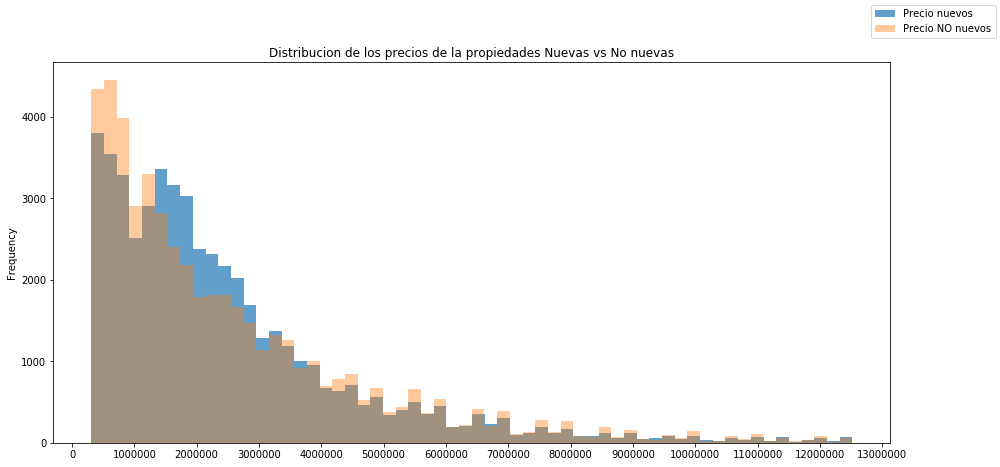

In [92]:
fig= plt.figure(figsize=(15, 7))
ax = plt.axes()
buckets = 60
g = nuevos["precio"].plot(kind = 'hist', bins = buckets, alpha = 0.7)
h = ventas_no_nuevas["precio"].sample(n=nuevos["precio"].count(), random_state = 500).plot.hist(bins = buckets, alpha = 0.4,)

fig.legend(["Precio nuevos", "Precio NO nuevos"])
#fig.add_subplot(h)
plt.title("Distribucion de los precios de la propiedades Nuevas vs No nuevas")
plt.ticklabel_format(style="plain") #SACA la notación científica de los precios
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000000)) #Decimos cada cuantos pesos mexicanos queremos que aparezca una marca en el grafico

Como podemos ver la distribucion de los precios de las propiedades nuevas vs las no nuevas (con antiguedad > 0) tienen ciertas características observables:
 - En el rango [0, 1000000] tenemos una mayor frecuencia de propiedades NO nuevas en venta
 - En el rango [1000000, 3000000] tenemos mas propiedades nuevas en venta
 - En los precios siguientes tienen distribuciones muy similares
 
Por lo tanto podría concluir que las propiedades nuevas se venden a un precio ligeramente mayor  
